<a href="https://colab.research.google.com/github/rajatgarg01/Pytorch/blob/main/Pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pytorch workflow Fundamentals

1. **Getting data ready**	Data can be almost anything but to get started we're going to create a simple straight line
2. **Building a model**	Here we'll create a model to learn patterns in the data, we'll also choose a loss function, optimizer and build a training loop.
3. **Fitting the model to data (training)**	We've got data and a model, now let's let the model (try to) find patterns in the (training) data.
4. **Making predictions and evaluating a model (inference)**	Our model's found patterns in the data, let's compare its findings to the actual (testing) data.
5. **Saving and loading a model**	You may want to use your model elsewhere, or come back to it later, here we'll cover that.
6. **Putting it all together**	Let's take all of the above and combine it.


In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

we are going to get torch,torch.nn and matplotlib

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.9.0+cpu'

##DATA(preparing and loading)

I want to stress that "data" in machine learning can be almost anything you can imagine. A table of numbers (like a big Excel spreadsheet), images of any kind, videos (YouTube has lots of data!), audio files like songs or podcasts, protein structures, text and more.

machine learning is a game of 2 parts:

1.Turn your data, whatever it is, into munber(a replresentation)

2.Pick or build to learn the representation as best as possible

Let's create our data as a straight line.

we'll use linear regression to create the data with known parameters and then we use pyttorch to see if we can build model to estimate these paramete usinfg gradient descent

In [3]:
weight=0.7
bias=0.3
#Create data
start=0
end=1
step=0.02
x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+bias
x[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

#split data into training and test sets

When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn from training data and then evaluate it on test data to get an indication of how well it generalizes to unseen examples.

In [4]:
train_split=int(0.8*len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]
len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

Wonderful, we've got 40 samples for training (X_train & y_train) and 10 samples for testing (X_test & y_test).

The model we create is going to try and learn the relationship between X_train & y_train and then we will evaluate what it learns on X_test and y_test.

But right now our data is just numbers on a page.

Let's create a function to visualize it.

In [5]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_label=y_test,
                     prediction=True):
  """
  plots training data, tst data, and compares predictions
  """
  plt.figure(figsize=(10,7))
  #plot traing data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="training data")
  #plot test data in green
  plt.scatter(test_data,test_label,c="g",s=4,label="test data")

  if prediction is not None:
    #plot the prediction in red(prediction are made on the test data)
    plt.scatter(test_data,prediction,c="r",s=4,label="prediction")
  plt.legend(prop={"size":14})  #show the legend


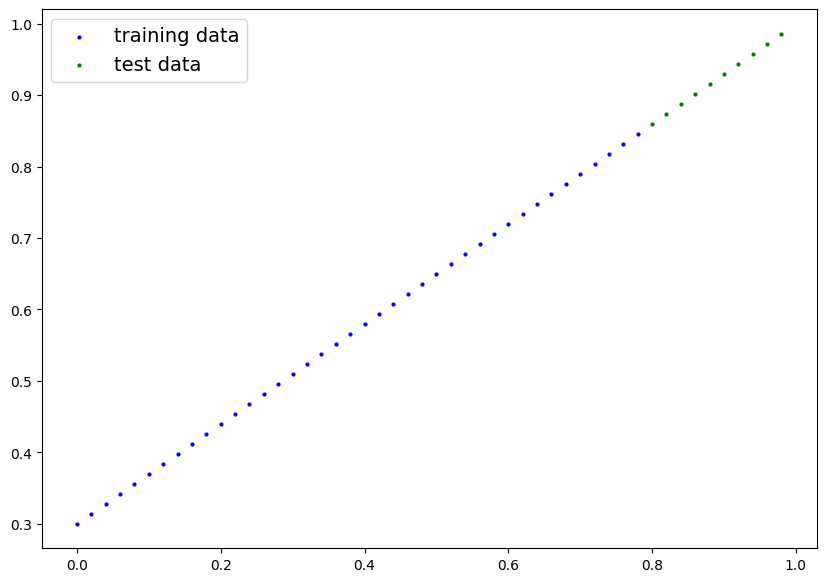

In [6]:
plot_predictions(prediction=None);

#Build the model

Now we got some data, let's build a model to use the blue dots to predict the green dots


let's replicate a standard linear regression model using pure pytorch

In [10]:
#Create a linear regression model class
class LinearRegressionModel(nn.Module):#almose everthing in pytorch is in NN.Modele
  def __init__(self):
    super().__init__()
    #initialize model parameters
    self.weights=nn.Parameter(torch.randn(1,#starts with random weight
                                          dtype=torch.float),#Pytorch loves float32 by default
                              requires_grad=True)# can we update this value by gradient decent?
    self.bias=nn.Parameter(torch.randn(1,# start with random bias
                                       dtype=torch.float),
                           requires_grad=True)
  def forward(self,x:torch.Tensor)->torch.Tensor:# "x" is the input data
    return self.weights*x+self.bias



PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are torch.nn, torch.optim, torch.utils.data.Dataset and torch.utils.data.DataLoader. For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).



torch.nn:-	Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).

torch.nn.Parameter:-	Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".

torch.nn.Module:-	The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.

torch.optim	Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).

def forward():-	All nn.Module subclasses require a forward() method, which defines the computation that will take place on the data passed to the particular module.Module (e.g. the linear regression formula above).

nn.Module contains the larger building blocks (layers)

nn.Parameter contains the smaller parameters like weights and biases (put these together to make nn.Module(s))

forward() tells the larger blocks how to make calculations on inputs (tensors full of data) within nn.Module(s)

torch.optim contains optimization methods on how to improve the parameters within nn.Parameter to better represent input data

##Checking the contents of a Pytorch model

Let's create a model instance with the class we've made and check its parameters using .parameters()

In [11]:
torch.manual_seed(42)
model_0=LinearRegressionModel()
#Check the nn.Parameter() within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

We can also get the state (what the model contains) of the model using .state_dict().

In [12]:
#list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

##Making prediction using torch.inference_mode()

To check this we can pass it the test data X-test to see how closely it predicts y_test.

When we pass data to our model, it'll go through the model's forward() method and produce a result using the computatuion we've defined

Let's make some prediction.


In [14]:
#Make predictions with model
with torch.inference_mode():
  y_preds=model_0(x_test)



WE are using torch.inference_mode() as a context manager(that's what the with torch.inference_mode(): is) to make the prediction)

As the name suggests,torch.inference_mode() is used when using a model for inference(making prediction).

torch.inference_mode() turns off a bunch of things(like gradient tracking, which is necessary for training but not for inferene) to make forward-passes( data going through forward() method) faster

In [18]:
#check the predictions
print(f"Number of testing samples: {len(x_test)}")
print(f"number of presiction made: {len(y_preds)}")
print(f"predicted values :\n {y_preds}")

Number of testing samples: 10
number of presiction made: 10
predicted values :
 tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


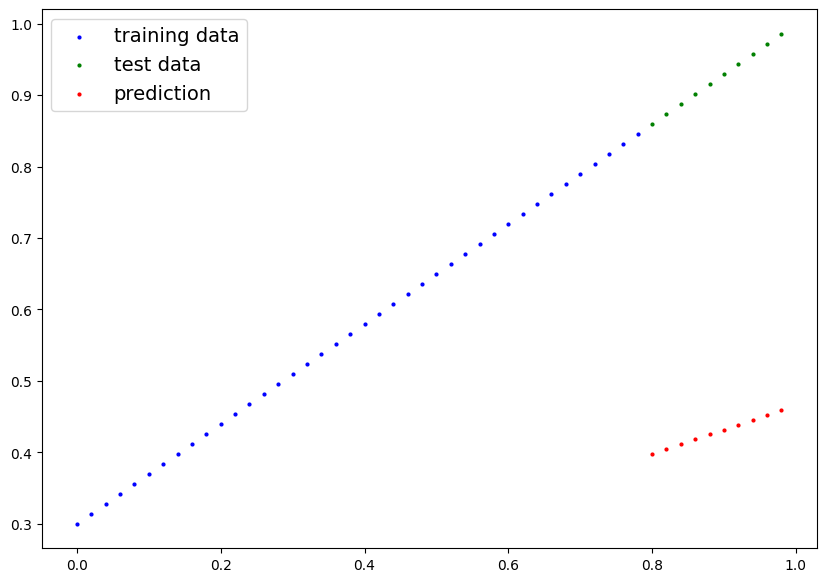

In [20]:
plot_predictions(prediction=y_preds)

In [21]:
y_test-y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

##Train model

right now our model is making prediction ising random parameters to make calculations, it,s basically guessing (randomly)

To fix that, we can update its internal parameters the wights and bias values we set randomly using nn.Parameter() and torch.randn() to be something that better represents the data

**Creating a loss function and optimizer in pytorch**

For our model to update its parameters on its own,we'll need to add a few more things to our recipe.

And thst,s a loss function as well as an optimizer

**Loss function**	Measures how wrong your model's predictions (e.g. y_preds) are compared to the truth labels (e.g. y_test). Lower the better.	PyTorch has plenty of built-in loss functions in torch.nn.	Mean absolute error (MAE) for regression problems (torch.nn.L1Loss()). Binary cross entropy for binary classification problems (torch.nn.BCELoss()).


**Optimizer**	Tells your model how to update its internal parameters to best lower the loss.	You can find various optimization function implementations in torch.optim.	Stochastic gradient descent (torch.optim.SGD()). Adam optimizer (torch.optim.Adam()).


and we'll use SGD, torch.optim.SGD(params,lr) where:

params is the target model parameters you.d like to optimize (e.g. the weights and bias we ramdomly set before)

lr is the learning rate you'd like the optimizer to update the parameters at, higer means the optimizer will try the larger updates

learning rate is considered a hyperparameter

In [23]:
# Create the loss function
loss_fn=nn.L1Loss() #MSE is same as L1Loss
#create the optimizer

optimizer=torch.optim.SGD(params=model_0.parameters(),# parameters of target model to optimize
                          lr=0.01)

#Creating an optimization loop in pytorch
 it's now time to create a training loop (and testing loop).

The training loop involves the model going through the training data and learning the relationships between the features and labels.

The testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data (the model never sees the testing data during training).

Each of these is called a "loop" because we want our model to look (loop through) at each sample in each dataset.


1	Forward pass	The model goes through all of the training data once, performing its forward() function calculations.	model(x_train)


2	Calculate the loss	The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.	loss = loss_fn(y_pred, y_train)


3	Zero gradients	The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step.	optimizer.zero_grad()


4	Perform backpropagation on the loss	Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards".	loss.backward()


5	Update the optimizer (gradient descent)	Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them.	optimizer.step()
pytorch training loop annotated

Note: The above is just one example of how the steps could be ordered or described. With experience you'll find making PyTorch training loops can be quite flexible.

And on the ordering of things, the above is a good default order but you may see slightly different orders. Some rules of thumb:

Calculate the loss (loss = ...) before performing backpropagation on it (loss.backward()).
Zero gradients (optimizer.zero_grad()) before computing the gradients of the loss with respect to every model parameter (loss.backward()).
Step the optimizer (optimizer.step()) after performing backpropagation on the loss (loss.backward()).
For resources to help understand what's happening behind the scenes with backpropagation and gradient descent, see the extra-curriculum section.

Let's put all of the above together and train our model for 100 epochs (forward passes through the data) and we'll evaluate it every 10 epochs.

In [26]:
torch.manual_seed(42)

epochs=100

train_loss_values=[]
test_loss_values=[]
epoch_counts=[]
for epoch in range(epochs):
  ##training
  model_0.train()

  #1.forward bias
  y_pred=model_0(x_train)

  #2.calculate the loss
  loss=loss_fn(y_pred,y_train)

  #3.zero gradients
  optimizer.zero_grad()

  #4.loss backward
  loss.backward()

  #5.optimizer
  optimizer.step()

  ##Testing

  #ut the model in evaluation mode
  model_0.eval()

  with torch.inference_mode():
    #1 forward pass on test data
    test_pred=model_0(x_test)

    #2.calculate loss on test data
    test_loss=loss_fn(test_pred,y_test.type(torch.float))

    #print out what's happening

    if epoch%10==0:
      epoch_counts.append(epoch)
      train_loss_values.append(loss.item())
      test_loss_values.append(test_loss.item())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")



Epoch: 0 | MAE Train Loss: 0.3013603389263153 | MAE Test Loss: 0.4675942063331604 
Epoch: 10 | MAE Train Loss: 0.18615034222602844 | MAE Test Loss: 0.3328842222690582 
Epoch: 20 | MAE Train Loss: 0.08227583020925522 | MAE Test Loss: 0.2069590985774994 
Epoch: 30 | MAE Train Loss: 0.05181945487856865 | MAE Test Loss: 0.14023718237876892 
Epoch: 40 | MAE Train Loss: 0.04503796249628067 | MAE Test Loss: 0.11182951927185059 
Epoch: 50 | MAE Train Loss: 0.04132963344454765 | MAE Test Loss: 0.09809747338294983 
Epoch: 60 | MAE Train Loss: 0.03785243630409241 | MAE Test Loss: 0.08776430785655975 
Epoch: 70 | MAE Train Loss: 0.03441363573074341 | MAE Test Loss: 0.0794917643070221 
Epoch: 80 | MAE Train Loss: 0.030979642644524574 | MAE Test Loss: 0.07190609723329544 
Epoch: 90 | MAE Train Loss: 0.02754882536828518 | MAE Test Loss: 0.06363357603549957 


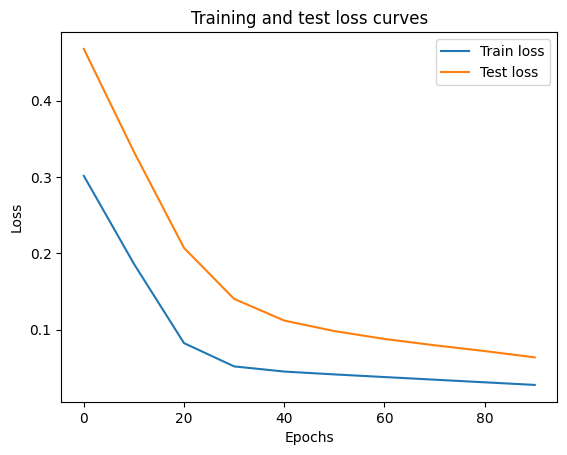

In [28]:
#ploting
plt.plot(epoch_counts,train_loss_values,label="Train loss")
plt.plot(epoch_counts,test_loss_values,label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [30]:
# Find our model's learned parameters
print("the model learned the folloeing values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

the model learned the folloeing values for weights and bias:
OrderedDict({'weights': tensor([0.5800]), 'bias': tensor([0.3503])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


This is the whole idea of machine learning and deep learning, there are some ideal values that describe our data and rather than figuring them out by hand, we can train a model to figure them out programmatically.

#MAking prediction with a trained Pytorch model(inference)

Once you've trained a model, you'll likely want to make predictions with it.

We've already seen a glimpse of this in the training and testing code above, the steps to do it outside of the training/testing loop are similar.

There are three things to remember when making predictions (also called performing inference) with a PyTorch model:


Set the model in evaluation mode (model.eval()).

Make the predictions using the inference mode context manager (with torch.inference_mode(): ...).

All predictions should be made with objects on the same device (e.g. data and model on GPU only or data and model on CPU only)

In [34]:
# set model in evaluation  mode
model_0.eval()

# setup the inference mode context manager

with torch.inference_mode():
 # model_0.to(device)
 # x_test=x_test.to(device)
  #make predictions
  y_preds=model_0(x_test)
y_preds

tensor([[0.8143],
        [0.8259],
        [0.8375],
        [0.8491],
        [0.8607],
        [0.8723],
        [0.8839],
        [0.8955],
        [0.9071],
        [0.9187]])

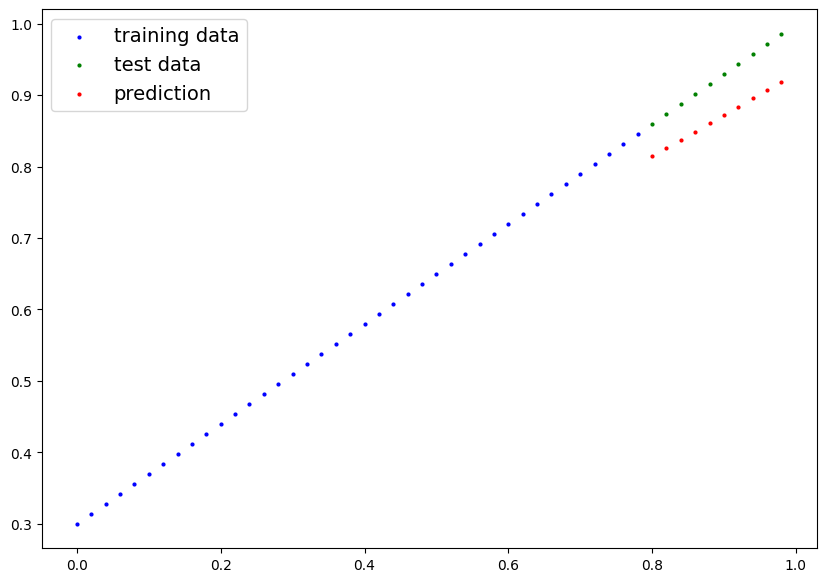

In [36]:
plot_predictions(prediction=y_preds)

# Saving and Loading a Pytorch madel



torch.save	Saves a serialized object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save.

torch.load	Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).

torch.nn.Module.load_state_dict	Loads a model's parameter dictionary (model.state_dict()) using a saved state_dict() object.


let's see how we can do that in few steps
1.we'll create a directory for saving models to called models using Python pathlib module

2.we'll create a file path to save the module to.

3. we'll call torch.save(obj,f) where obj is the target model's state_dict() and f is the filename of where to save model.


In [38]:
from pathlib import Path

#create model directary
Model_path=Path("MOdel")
Model_path.mkdir(parents=True,exist_ok=True)

#create model save path

Model_name="01_pytorch_workflow_model.pth"
model_save_path=Model_path/Model_name

#save the model state dict
print(f"saving model to:{model_save_path}")
torch.save(obj=model_0.state_dict(),# Only saving models learned parameter
           f=model_save_path)


saving model to:MOdel/01_pytorch_workflow_model.pth


In [41]:
#Check the saved model
!ls -l MOdel/01_pytorch_workflow_model.pth

-rw-r--r-- 1 root root 2101 Jan 13 13:58 MOdel/01_pytorch_workflow_model.pth


#Loading a saved Pytorch model's state_dict()



In [51]:
#Instantiate a new istance of our model
Loaded_model_0=LinearRegressionModel()

#load the state_dict of our saved model
Loaded_model_0_state_dict=torch.load(f=model_save_path)

#print out the loaded model
print(f"loaded model:\n{Loaded_model_0.state_dict()}")

loaded model:
OrderedDict({'weights': tensor([2.2082]), 'bias': tensor([-0.6380])})


In [52]:
# 1. Put the loaded model into evaluation mode
Loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = Loaded_model_0(x_test) # perform a forward pass on the test data with the loaded model

In [53]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [54]:
loaded_model_preds

tensor([[1.1286],
        [1.1727],
        [1.2169],
        [1.2611],
        [1.3052],
        [1.3494],
        [1.3935],
        [1.4377],
        [1.4819],
        [1.5260]])